In [352]:
import scipy.linalg as sl
import numpy as np
import matplotlib.pyplot as plt

In [353]:
def randomizedsampling(size, p):
    
    k = 0
    a = np.random.choice(2,size,p = [p[0],p[1]])
    for i in a:
        if i == 1:
            k = k+1
    nsize = [size-k,k]
    return(nsize)

# Question 2 Part 1


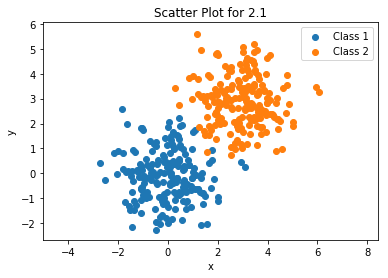

[181]
probability of error 0.0075


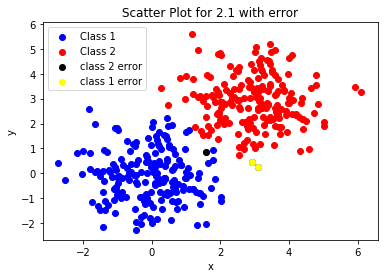

In [354]:
size=400
p=[0.5,0.5]
n=randomizedsampling(size,p)
mean = np.array([0, 0])
mean2= np.array([3,3])
m1=mean.transpose()
m2=mean2.transpose()
cov = np.array([[1, 0], [0, 1]])  # diagonal covariance
#Diagonal covariance means that points are oriented along x or y-axis:
c=sl.cholesky(cov)
g=np.random.normal(size=(n[0],cov.shape[0]))
x=(g.dot(c)+mean).T
x1=(g.dot(c)+mean2).T
plt.scatter(x[0,:], x[1,:],label='Class 1')
plt.scatter(x1[0,:], x1[1,:],label='Class 2')
plt.legend()
plt.axis('equal')
plt.title('Scatter Plot for 2.1')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

a1=mean.reshape([2,1])
w1=a1
w10=-((a1.T@a1)/(2))
g11 = w1.T@x+w10+np.log(0.5)
g12 = w1.T@x1+w10+np.log(0.5)

a2=mean2.reshape(2,1)/1
w2=a2
w20=-((a2.T@a2)/(2))
g21=w2.T@x+w20+np.log(0.5)
g22=w2.T@x1+w20+np.log(0.5)

c1=[]
c2=[]
p1=(g22-g12)
p2=(g21-g11)
p1 = p1.reshape([p1.size])
p2 = p2.reshape([p2.size])
ax = []
ay = []
ax1 = []
ay1 = []
for i in range(0,len(p1)):
    if p1[i]<0:
        c1.append(i)
print(c1)

for i in range(0,len(p2)):
    if p2[i]>0:
        c2.append(i)

M = [x1[:,i] for i in c1]        
Z = [x[:,i] for i in c2] 

for i in M:
    ax.append(i[0])
    ay.append(i[1])
    
for i in Z:
    ax1.append(i[0])
    ay1.append(i[1])
error=(len(M)+len(Z))/400
print("probability of error", error)
plt.scatter(x[0,:], x[1,:], color = "blue", label='Class 1')
plt.scatter(x1[0,:], x1[1,:], color = "red",label='Class 2')
plt.scatter(ax,ay, color =(0,0,0),label='class 2 error')
plt.scatter(ax1,ay1, color = (1,1,0),label='class 1 error')
plt.legend()
plt.title('Scatter Plot for 2.1 with error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Question 2 Part 2

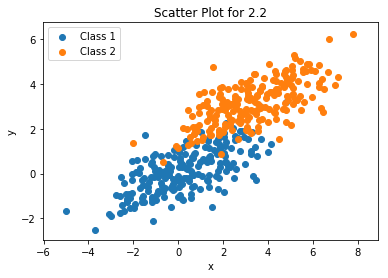

[12, 41, 56, 138, 139, 140, 151, 191]
probability of error 0.065


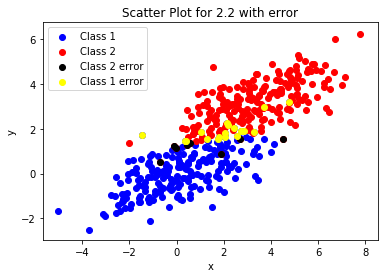

In [355]:
size=400
p=[0.5,0.5]
n=randomizedsampling(size,p)
cov2 = np.array([[3, 1], [1, 0.8]])  # diagonal covariance
#Diagonal covariance means that points are oriented along x or y-axis:
c=sl.cholesky(cov2)
g=np.random.normal(size=(n[0],cov.shape[0]))
x=(g.dot(c)+mean).T
x1=(g.dot(c)+mean2).T

plt.scatter(x[0,:], x[1,:],label='Class 1')
plt.scatter(x1[0,:], x1[1,:],label='Class 2')
plt.legend()
plt.title('Scatter Plot for 2.2')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

a1=mean.reshape(2,1)
w21=np.linalg.inv(cov2)@a1
w210=-(1/2)*a1.T@np.linalg.inv(cov2)@a1
g211=w21.T@x+w210+np.log(0.5)
g212=w21.T@x1+w210+np.log(0.5)

a2=mean2.reshape(2,1)
w22=np.linalg.inv(cov2)@a2
w220=-(1/2)*a2.T@np.linalg.inv(cov2)@a2
g221=w22.T@x+w220+np.log(0.5)
g222=w22.T@x1+w220+np.log(0.5)


c1=[]
c2=[]
p1=(g222-g212)
p2=(g221-g211)
p1 = p1.reshape([p1.size])
p2 = p2.reshape([p2.size])
ax = []
ay = []
ax1 = []
ay1 = []
for i in range(0,len(p1)):
    if p1[i]<0:
        c1.append(i)
print(c1)

for i in range(0,len(p2)):
    if p2[i]>0:
        c2.append(i)

b1 = [x1[:,i] for i in c1]        
b2 = [x[:,i] for i in c2] 

for i in b1:
    ax.append(i[0])
    ay.append(i[1])
    
for i in b2:
    ax1.append(i[0])
    ay1.append(i[1])
error=(len(b1)+len(b2))/400
print("probability of error", error)
plt.scatter(x[0,:], x[1,:], color = "blue",label='Class 1')
plt.scatter(x1[0,:], x1[1,:], color = "red",label='Class 2')
plt.scatter(ax,ay, color =(0,0,0),label='Class 2 error')
plt.scatter(ax1,ay1, color = (1,1,0),label='Class 1 error')
plt.legend()
plt.title('Scatter Plot for 2.2 with error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Question 2 Part 3

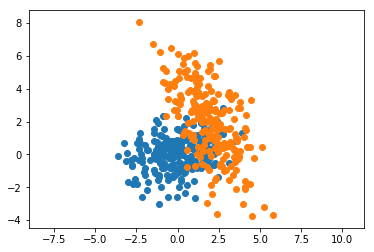

[65, 146]
probability of error 0.215


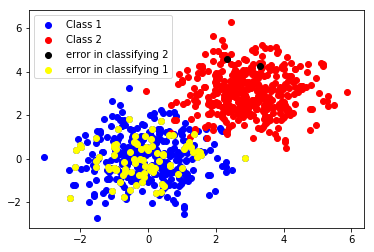

In [364]:
import math
size=400
p=[0.5,0.5]
n=randomizedsampling(size,p)
mean31= np.array([0, 0])
a1=mean31.reshape(2,1)
mean32= np.array([2,2])
a2=mean32.reshape(2,1)
cov61 = np.array([[2, 0.5], [0.5, 1]]) 
cov62 = np.array([[2, -1.9], [-1.9, 5]])
c61=sl.cholesky(cov61)
c62=sl.cholesky(cov62)
ga=np.random.normal(size=(n[0],cov.shape[0]))
gb=np.random.normal(size=(n[0],cov.shape[0]))

x61=(ga.dot(c61)+mean61).T
x62=(gb.dot(c62)+mean62).T

plt.scatter(x61[0,:], x61[1,:],label='class 1')
plt.scatter(x62[0,:], x62[1,:],label='class 2')
plt.axis('equal')
plt.show()

w_61=-(1/2)*np.linalg.inv(cov61)
w61=np.linalg.inv(cov61)@a1

w610=(-1/2)*a1.T@np.linalg.inv(cov61)@a1-(1/2)*np.log(np.linalg.det(cov61))+np.log(0.5)
#w_61=-(1/2)*np.linalg.inv(cov61)
w61=np.matmul(np.linalg.inv(cov61),a1)
w610=np.matmul(a1.T,np.matmul(np.linalg.inv(cov61),a1))*(-1/2)+np.log(0.05)-(1/2)*np.log(np.linalg.det(cov61))

temp3 = []
for i in range(n[0]):
    temp3.append(x61[:,i].T@w_61@x61[:,i])
g611=temp3+np.matmul(w61.T,x61)+w610

temp4 = []
for i in range(x62.shape[1]):
    temp4.append(x62[:,i].T@w_61@x62[:,i])
g612=temp4+np.matmul(w61.T,x62)+w610
w_62=-(1/2)*np.linalg.inv(cov62)
w62=np.linalg.inv(cov62)@a2
w620=(-1/2)*a2.T@np.linalg.inv(cov62)@a2-(1/2)*np.log(np.linalg.det(cov62))+np.log(0.5)
#g62=x62.T@(w_62@x62)+w62.T@x62+w620

temp = []
for i in range(x61.shape[1]):
    temp.append(x61[:,i].T@w_62@x61[:,i])
    
# g621=np.matmul(x61.T,np.matmul(w_62,x61))+np.matmul(w62.T,x61)+w620
g621 = np.array(temp) + np.matmul(w62.T,x61)+w620
# g622=np.matmul(x62.T,np.matmul(w_62,x62))+np.matmul(w62.T,x62)+w620
# print(np.matmul(w62.T,x61).shape)
temp1 = []
for i in range(x62.shape[1]):
    temp1.append(x62[:,i].T@w_62@x62[:,i])
g622=np.array(temp1)+np.matmul(w62.T,x62)+w620


c1=[]
c2=[]
p1=(g622-g612)
p2=(g621-g611)

p1 = p1.reshape([p1.size])
p2 = p2.reshape([p2.size])
ax = []
ay = []
ax1 = []
ay1 = []
for i in range(0,len(p1)):
    if p1[i]<0:
        c1.append(i)
print(c1)

for i in range(0,len(p2)):
    if p2[i]>0:
        c2.append(i)

b1 = [x1[:,i] for i in c1]        
b2 = [x[:,i] for i in c2] 

for i in b1:
    ax.append(i[0])
    ay.append(i[1])
    
for i in b2:
    ax1.append(i[0])
    ay1.append(i[1])
error=(len(b1)+len(b2))/400
print("probability of error", error)
plt.scatter(x[0,:], x[1,:], color = "blue", label='Class 1')
plt.scatter(x1[0,:], x1[1,:], color = "red", label='Class 2')
plt.legend()
plt.scatter(ax,ay, color =(0,0,0), label='error in classifying 2')
plt.scatter(ax1,ay1, color = (1,1,0), label='error in classifying 1')
plt.legend()
plt.show()




In [207]:

a1=mean31.reshape(2,1)
W31=-(1/2)*np.linalg.inv(cov31)
w31=np.linalg.inv(cov31)@a1
w310=-(1/2)*a1.T@np.linalg.inv(cov31)@a1-[(1/2)*np.log(np.linalg.det(cov31))]+np.log(0.5)
g31=x31.T@W31@x31+w31.T@x31+w310
g31.shape

(400, 400)

In [215]:
a2=mean32.reshape(2,1)
W32=-(1/2)*np.linalg.inv(cov32)
w32=np.linalg.inv(cov32)@a2
w320=-(1/2)*a2.T@np.linalg.inv(cov32)@a2-(1/2)*np.log(np.linalg.det(cov32))+np.log(0.5)
g32=x.T@W32@x+w32.T@x+w320

In [168]:
g32.shape

(400, 400)

# Question 2 Part 4

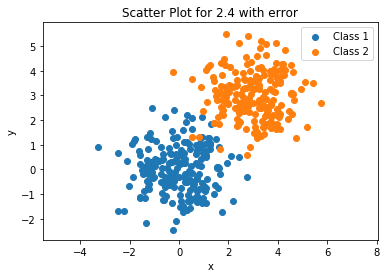

[11, 15, 23]
probability of error 0.0125


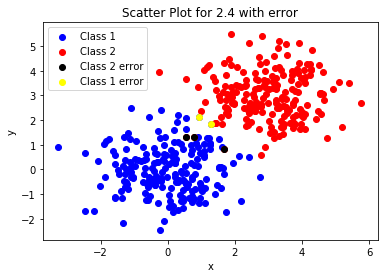

In [365]:
size=400
p=[0.5,0.5]
n=randomizedsampling(size,p)
mean41= np.array([0, 0])
mean42= np.array([3,3])
cov = np.array([[1, 0], [0, 1]]) 

c=sl.cholesky(cov)
g=np.random.normal(size=(n[0],cov.shape[0]))

x=(g.dot(c)+mean41).T
x1=(g.dot(c)+mean42).T

plt.scatter(x[0,:], x[1,:],label='Class 1')
plt.scatter(x1[0,:], x1[1,:],label='Class 2')
plt.legend()
plt.title('Scatter Plot for 2.4 with error')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

a1=mean.reshape([2,1])
w1=a1
w10=-((a1.T@a1)/(2))
g11 = w1.T@x+w10+np.log(0.05)
g12 = w1.T@x1+w10+np.log(0.95)
a2=mean2.reshape(2,1)/1
w2=a2
w20=-((a2.T@a2)/(2))
g21=w2.T@x+w20+np.log(0.05)
g22=w2.T@x1+w20+np.log(0.95)
c1=[]
c2=[]
p1=(g22-g12)
p2=(g21-g11)
p1 = p1.reshape([p1.size])
p2 = p2.reshape([p2.size])
ax = []
ay = []
ax1 = []
ay1 = []
for i in range(0,len(p1)):
    if p1[i]<0:
        c1.append(i)
print(c1)

for i in range(0,len(p2)):
    if p2[i]>0:
        c2.append(i)

b1 = [x1[:,i] for i in c1]        
b2 = [x[:,i] for i in c2] 

for i in b1:
    ax.append(i[0])
    ay.append(i[1])
    
for i in b2:
    ax1.append(i[0])
    ay1.append(i[1])
error=(len(b1)+len(b2))/400
print("probability of error", error)
plt.scatter(x[0,:], x[1,:], color = "blue",label='Class 1')
plt.scatter(x1[0,:], x1[1,:], color = "red",label='Class 2')
plt.scatter(ax,ay, color ='black',label='Class 2 error')
plt.scatter(ax1,ay1, color = 'yellow',label='Class 1 error')
plt.legend()
plt.title('Scatter Plot for 2.4 with error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Question 2 Part 5

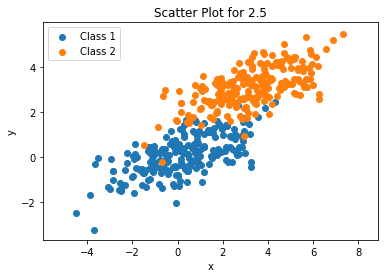

[43, 68, 93, 100]


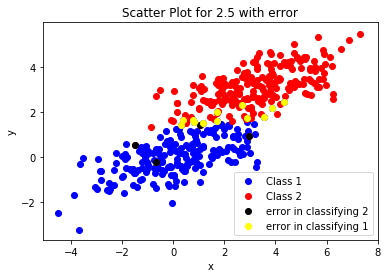

In [366]:
size=400
p=[0.5,0.5]
n=randomizedsampling(size,p)
cov2 = np.array([[3, 1], [1, 0.8]])  # diagonal covariance
#Diagonal covariance means that points are oriented along x or y-axis:
c=sl.cholesky(cov2)
g=np.random.normal(size=(n[0],cov2.shape[0]))
x=(g.dot(c)+mean).T
x1=(g.dot(c)+mean2).T

# cov2=[[3,1],[1,0.8]]
# import matplotlib.pyplot as plt
  
# x = np.random.multivariate_normal(m1, cov2, 400).T
# x1 = np.random.multivariate_normal(m2, cov2, 400).T
plt.scatter(x[0,:], x[1,:], label='Class 1')
plt.scatter(x1[0,:], x1[1,:], label='Class 2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot for 2.5')
plt.axis('equal')
plt.show()
a1=mean.reshape(2,1)
w21=np.linalg.inv(cov2)@a1
w210=-(1/2)*a1.T@np.linalg.inv(cov2)@a1
g211=w21.T@x+w210+np.log(0.05)
g212=w21.T@x1+w210+np.log(0.95)
a2=mean2.reshape(2,1)
w22=np.linalg.inv(cov2)@a2
w220=-(1/2)*a2.T@np.linalg.inv(cov2)@a2
g221=w22.T@x+w220+np.log(0.05)
g222=w22.T@x1+w220+np.log(0.95)
c1=[]
c2=[]
p1=(g222-g212)
p2=(g221-g211)
p1 = p1.reshape([p1.size])
p2 = p2.reshape([p2.size])
ax = []
ay = []
ax1 = []
ay1 = []
for i in range(0,len(p1)):
    if p1[i]<0:
        c1.append(i)
print(c1)

for i in range(0,len(p2)):
    if p2[i]>0:
        c2.append(i)

b1 = [x1[:,i] for i in c1]        
b2 = [x[:,i] for i in c2] 

for i in b1:
    ax.append(i[0])
    ay.append(i[1])
    
for i in b2:
    ax1.append(i[0])
    ay1.append(i[1])
plt.scatter(x[0,:], x[1,:], color = "blue", label='Class 1')
plt.scatter(x1[0,:], x1[1,:], color = "red", label='Class 2')
plt.scatter(ax,ay, color =(0,0,0), label='error in classifying 2')
plt.scatter(ax1,ay1, color = (1,1,0), label='error in classifying 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot for 2.5 with error')
plt.show()

# Question 2 Part 6

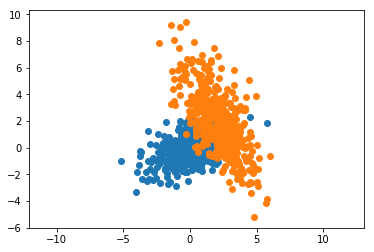

[34, 378]


IndexError: index 378 is out of bounds for axis 1 with size 210

In [369]:
import math
mean61= np.array([0, 0])
a1=mean61.reshape(2,1)
mean62= np.array([2,2])
a2=mean62.reshape(2,1)
cov61 = np.array([[2, 0.5], [0.5, 1]]) 
cov62 = np.array([[2, -1.9], [-1.9, 5]])
c61=sl.cholesky(cov61)
c62=sl.cholesky(cov62)
ga=np.random.normal(size=(400,cov61.shape[0]))
gb=np.random.normal(size=(400,cov62.shape[0]))

x61=(ga.dot(c61)+mean61).T
x62=(gb.dot(c62)+mean62).T

plt.scatter(x61[0,:], x61[1,:])
plt.scatter(x62[0,:], x62[1,:])
plt.axis('equal')
plt.show()

w_61=-(1/2)*np.linalg.inv(cov61)
w61=np.linalg.inv(cov61)@a1

w610=(-1/2)*a1.T@np.linalg.inv(cov61)@a1-(1/2)*np.log(np.linalg.det(cov61))+np.log(0.05)
#w_61=-(1/2)*np.linalg.inv(cov61)
w61=np.matmul(np.linalg.inv(cov61),a1)
w610=np.matmul(a1.T,np.matmul(np.linalg.inv(cov61),a1))*(-1/2)+np.log(0.05)-(1/2)*np.log(np.linalg.det(cov61))

temp3 = []
for i in range(400):
    temp3.append(x61[:,i].T@w_61@x61[:,i])
g611=temp3+np.matmul(w61.T,x61)+w610

temp4 = []
for i in range(400):
    temp4.append(x62[:,i].T@w_61@x62[:,i])
g612=temp4+np.matmul(w61.T,x62)+w610
w_62=-(1/2)*np.linalg.inv(cov62)
w62=np.linalg.inv(cov62)@a2
w620=(-1/2)*a2.T@np.linalg.inv(cov62)@a2-(1/2)*np.log(np.linalg.det(cov62))+np.log(0.95)
#g62=x62.T@(w_62@x62)+w62.T@x62+w620

temp = []
for i in range(400):
    temp.append(x61[:,i].T@w_62@x61[:,i])
    
# g621=np.matmul(x61.T,np.matmul(w_62,x61))+np.matmul(w62.T,x61)+w620
g621 = np.array(temp) + np.matmul(w62.T,x61)+w620
# g622=np.matmul(x62.T,np.matmul(w_62,x62))+np.matmul(w62.T,x62)+w620
# print(np.matmul(w62.T,x61).shape)
temp1 = []
for i in range(400):
    temp1.append(x62[:,i].T@w_62@x62[:,i])
g622=np.array(temp1)+np.matmul(w62.T,x62)+w620


c1=[]
c2=[]
p1=(g622-g612)
p2=(g621-g611)


p1 = p1.reshape([400])
p2 = p2.reshape([400])
ax = []
ay = []
ax1 = []
ay1 = []
for i in range(0,len(p1)):
    if p1[i]<0:
        c1.append(i)
print(c1)

for i in range(0,len(p2)):
    if p2[i]>0:
        c2.append(i)

b1 = [x1[:,i] for i in c1]        
b2 = [x[:,i] for i in c2] 

for i in b1:
    ax.append(i[0])
    ay.append(i[1])
    
for i in b2:
    ax1.append(i[0])
    ay1.append(i[1])
error=(len(b1)+len(b2))/400
print("probability of error", error)
plt.scatter(x[0,:], x[1,:], color = "blue", label='uwq')
plt.scatter(x1[0,:], x1[1,:], color = "red", label='fd')
plt.legend()
plt.scatter(ax,ay, color =(0,0,0), label='error in classifying 2')
plt.scatter(ax1,ay1, color = (1,1,0), label='error in classifying 1')
plt.legend()
plt.show()
